## Note: See https://github.com/dsannad/Capstone-1-Project for Project Report and Slidedeck

#### A.N. : You should read the report first, or read it alongside this code! 

# Data Acquisition, Cleaning, and Wrangling

I'm starting out by importing the most common data science libraries in one fell swoop at the beginning, so I don't have to go back in and do it later cell by cell when I need them, even though there will be specific functions that I will be bringing in later on.

In [1]:
%matplotlib inline 
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

Now, let's get started on the data set. This is the Communities and Crime Unnormalized Data Set from UCI.

In [2]:
df = pd.read_csv(r'C:\Users\Anna\Desktop\CommViolPredUnnormalizedData.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,...,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,...,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,...,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?,?,?,?,0.0,?,3,8.3,6,16.6,56,154.95,14,38.74,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,...,0,2.04,88.71,56.70,90.17,96.24,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,5.2,3217.7,3.31,?,?,?,?,0.0,?,0,0.0,10,57.86,10,57.86,33,190.93,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,...,0,1.74,73.75,42.22,60.34,89.02,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,11.5,974.2,0.38,?,?,?,?,0.0,?,0,0.0,?,?,4,32.04,14,112.14,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


Now let's take some broad look at the data by exploring. This looks like a pretty big dataset, what can we learn about it before diving in?

In [3]:
df.shape
#This answers the question: Exactly how much data is in this dataset?

(2215, 147)

In [4]:
df.describe()
#some more info about what its the data by columns,but notice that not every single column is in here, only numerical ones

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,...,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,120,121,122,127,129,130
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,4.773472e+04,70.465309,33984.696163,78.312758,0.881842,43.750935,26.409418,6.801445,15.969002,39857.055079,15603.524605,16567.698420,11541.749436,12229.191422,14227.989616,11018.998194,7.590853e+03,11.620537,9.186646,22.305120,23.056876,6.045242,62.021612,18.228907,24.532298,13.819165,28.209201,9.127585,30.683517,12.325300,10.812515,3.129698,74.059129,71.227255,81.865422,75.521788,60.542641,68.854795,2141.418962,...,27.544181,34.733928,1.099124,1.697463,2.307503,2.943761,87.074993,2.405792,5.386619,3.915788,2.615842,2.740483,2.367138,66.369454,4.132438,45.405341,2.640632,1748.368849,92.933973,63.368298,2.778524,34.773887,1962.623476,4.289824,0.425273,88695.802257,113097.523251,145318.257788,56622.455530,329.966591,428.537246,527.252822,197.286230,501.466366,26.298104,20.990158,13.010203,66.953499,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,2.056067e+05,44.080275,13424.680011,7.950672,0.689006,12.787925,8.295604,4.700335,4.622553,14251.206032,6281.558523,6346.840251,9232.102062,14853.836177,9881.266395,5884.063446,3.936146e+04,8.600352,6.666703,10.989517,12.687213,2.895618,8.312045,8.099281,6.659470,6.430264,9.326123,2.802747,8.127991,3.262613,3.000883,0.240743,10.525952,12.045048,12.263736,10.365262,8.008937,6.679960,14692.582838,...,14.368813,16.327322,1.595766,2.461060,3.286648,4.246468,14.076087,4.210368,3.794309,3.175770,0.315646,0.297421,0.391806,14.182588,5.599131,13.778347,0.512686,6503.866478,5.040736,13.970057,3.592396,13.911468,11.166555,4.088175,0.426188,66670.781534,81906.362277,99030.913816,39106.498041,144.138461,170.706644,199.290780,85.205688,169.271735,2.979297,2.987622,1.419679,564.253149,245.452553,8.418476,16.750061,10.517926,10.878186,7.287836,109.822600,2828.993341,4.912917,2.877128,58.166468,9.156829
min,1.000000,1.000500e+04,1.600000,0.000000,2.680000,0.030000,0.120000,4.580000,9.380000,4.640000,1.660000,0.000000e+00,0.000000,8866.000000,31.680000,0.000000,5.810000,4.810000,0.180000,3.460000,10447.000000,5237.000000,5472.000000,0.000000,0.000000,0.000000,0.000000,7.800000e+01,0.640000,0.200000,1.460000,1.630000,1.320000,24.820000,2.050000,8.690000,1.370000,6.480000,2.130000,12.060000,3.350000,2.830000,2.290000,22.970000,1

In [5]:
df.info()
#In addition to giving me some more information on the shape, this points out something important that I wanted to explore more,
#the types of the data that is included in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [6]:
#Based on describe and info, what's with the missing columns/object types and will they affect later on?
print(df.dtypes)

0       object
1       object
2       object
3       object
4        int64
5        int64
6      float64
7      float64
8      float64
9      float64
10     float64
11     float64
12     float64
13     float64
14     float64
15       int64
16     float64
17       int64
18     float64
19     float64
20     float64
21     float64
22     float64
23     float64
24       int64
25       int64
26       int64
27       int64
28       int64
29       int64
        ...   
117     object
118     object
119     object
120    float64
121    float64
122    float64
123     object
124     object
125     object
126     object
127    float64
128     object
129      int64
130    float64
131     object
132     object
133     object
134     object
135     object
136     object
137     object
138     object
139     object
140     object
141     object
142     object
143     object
144     object
145     object
146     object
Length: 147, dtype: object


So as I'm going through the data in the dataset, I notice that the objects columns either fall into one of two categories. The first involves the object columns at the beginning of the dataset. These are just identifying columns which include the state and city the data is of, mostly just identifying data. The other object columns seem to be because of how the missing data is indicated in the dataset, which is using a character, and not a number such as 0 leading the columns to be made of objects. Later on, in cleaning, we will see if we can remedy this based on techniques used to fill in missing data, or if there is too much missing data to fill in, and the column must be eliminated.

However, more than anything, I noticed as I'm going through this dataset, that none of the columns have names. I can't tell what column 4 or 6 or 120 is, so let's go back and insert column names so we can figure out exactly what this data means.

First, I had to take an extra step outside of this notebook, and slightly clean a variable list that they included and extract only the column names out of it, and saved it in its own CSV file.

In [7]:
columns_from_excel = pd.read_csv(r'C:\Users\Anna\Desktop\ColumnNames.csv',header=None)
columns_from_excel=columns_from_excel.values.flatten().tolist()
df.columns=columns_from_excel
df.head()

,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,...,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,numPolice,policePerPop,policeField,policeFieldPerPop,policeCalls,policCallPerPop,policCallPerOffic,policePerPop2,racialMatch,pctPolicWhite,pctPolicBlack,pctPolicHisp,pctPolicAsian,pctPolicMinority,officDrugUnits,numDiffDrugsSeiz,policAveOT,landArea,popDensity,pctUsePubTrans,policCarsAvail,policOperBudget,pctPolicPatrol,gangUnit,pctOfficDrugUnit,policBudgetPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,...,0,10.66,53.72,65.29,78.09,89.14,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6.5,1845.9,9.63,?,?,?,?,0.0,?,0,0.0,0,0,1,8.2,4,32.81,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,...,0,8.30,77.17,71.27,90.22,96.12,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2186.7,3.84,?,?,?,?,0.0,?,0,0.0,1,4.25,5,21.26,24,102.05,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,...,0,5.00,44.77,36.60,61.26,82.85,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10.6,2780.9,4.37,?,?,?,?,0.0,?,3,8.3,6,16.6,56,154.95,14,38.74,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,...,0,2.04,88.71,56.70,90.17,96.24,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,5.2,3217.7,3.31,?,?,?,?,0.0,?,0,0.0,10,57.86,10,57.86,33,190.93,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.0,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,...,0,1.74,73.75,42.22,60.34,89.02,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,11.5,974.2,0.38,?,?,?,?,0.0,?,0,0.0,?,?,4,32.04,14,112.14,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


Now the dataset has easy to read columns!  Some might not make sense but the important ones that end up affecting conclusions down the road will be fully explained.

And now for good measure, we will be exporting this new dataset that is the original untouched data plus column names to a separate file that makes it easier for others.

In [8]:
df.to_csv(r'C:\Users\Anna\Desktop\CommViolData.csv')

Now while looking at the dataset, I noticed that there were missing values, so I'm checking a few things, first, what it is denoted as, and then seeing exactly how much data is missing in the entire dataset.

In [9]:
#checking to see what missing data is denoted as
df.iloc[2,2]

'?'

In [10]:
#wanted to calculate how much is missing in each column, so we wrote a function.
def data_missing(x):
    return sum(x=='?')

In [11]:
#Now finding out how many columns are missing data.
print("Missing values per column:")
print(df.apply(data_missing,axis=0))

Missing values per column:
communityname           0
State                   0
countyCode           1221
communityCode        1224
fold                    0
pop                     0
perHoush                0
pctBlack                0
pctWhite                0
pctAsian                0
pctHisp                 0
pct12-21                0
pct12-29                0
pct16-24                0
pct65up                 0
persUrban               0
pctUrban                0
medIncome               0
pctWwage                0
pctWfarm                0
pctWdiv                 0
pctWsocsec              0
pctPubAsst              0
pctRetire               0
medFamIncome            0
perCapInc               0
whitePerCap             0
blackPerCap             0
NAperCap                0
asianPerCap             0
                     ... 
officDrugUnits       1872
numDiffDrugsSeiz     1872
policAveOT           1872
landArea                0
popDensity              0
pctUsePubTrans          0
policCarsAv

So I created a threshold here of about 1200 or more of the dataset being missing in a certain column as being problematic. Those with a few missing values could be dealt with using filling techniques, but those with too many missing values would not be accurately portrayed. Therefore in certain columns, where as much as 85% of the data was missing, I removed them as to not skew our analysis based on variables that were not complete. 

In [12]:
#dropping all the columns that have wayyy too many missing fields to populate correctly
df2=df.drop(['numPolice','policePerPop','policeField','policeFieldPerPop','policeCalls','policCallPerPop','policCallPerOffic','policePerPop2','racialMatch','pctPolicWhite','pctPolicBlack','pctPolicHisp','pctPolicAsian','pctPolicMinority','officDrugUnits','numDiffDrugsSeiz','policAveOT','policCarsAvail','policOperBudget','pctPolicPatrol','gangUnit','policBudgetPerPop'],axis=1)

In [13]:
df2=df2.replace('?', np.NaN)
df2.shape
#replacing the missing values with what python recognizes as a missing value and double checking columns were dropped

(2215, 125)

In [14]:
#now lets do some checking for data validity. For this, I will be checking that all percent columns are valid percentages.
df_check_pct = df2[df2.columns[df2.columns.str.startswith('pct')]]

In [15]:
print(np.where((df_check_pct<0) | (df_check_pct>100))) #verifying that percent data makes sense 
#Since array is empty, nowhere where percentages are invalid, everything looks good! 

(array([], dtype=int64), array([], dtype=int64))


In [16]:
#let's do the describe again, now that there are column names and some temporary "fills" with missing data.
df2.describe()

,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,pctKids-4w2Par,pct12-17w2Par,pctWorkMom-6,pctWorkMom-18,kidsBornNevrMarr,...,pctFgnImmig-8,pctFgnImmig-10,pctImmig-3,pctImmig-5,pctImmig-8,pctImmig-10,pctSpeakOnlyEng,pctNotSpeakEng,pctLargHousFam,pctLargHous,persPerOccupHous,persPerOwnOccup,persPerRenterOccup,pctPersOwnOccup,pctPopDenseHous,pctSmallHousUnits,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit,murders,murdPerPop
count,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2.215000e+03,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5.494357,5.311798e+04,2.707327,9.335102,83.979819,2.670203,7.950176,14.445837,27.644840,13.975142,11.836393,4.773472e+04,70.465309,33984.696163,78.312758,0.881842,43.750935,26.409418,6.801445,15.969002,39857.055079,15603.524605,16567.698420,11541.749436,12229.191422,14227.989616,11018.998194,7.590853e+03,11.620537,9.186646,22.305120,23.056876,6.045242,62.021612,18.228907,24.532298,13.819165,28.209201,9.127585,30.683517,12.325300,10.812515,3.129698,74.059129,71.227255,81.865422,75.521788,60.542641,68.854795,2141.418962,...,27.544181,34.733928,1.099124,1.697463,2.307503,2.943761,87.074993,2.405792,5.386619,3.915788,2.615842,2.740483,2.367138,66.369454,4.132438,45.405341,2.640632,1748.368849,92.933973,63.368298,2.778524,34.773887,1962.623476,4.289824,0.425273,88695.802257,113097.523251,145318.257788,56622.455530,329.966591,428.537246,527.252822,197.286230,501.466366,26.298104,20.990158,13.010203,66.953499,17.823476,7.340302,61.539630,51.538596,77.411079,88.111865,27.419955,2783.835034,3.041124,0.980163,7.764786,5.859296
std,2.872924,2.046203e+05,0.334120,14.247156,16.419080,4.473843,14.589832,4.518623,6.181517,5.970747,4.777565,2.056067e+05,44.080275,13424.680011,7.950672,0.689006,12.787925,8.295604,4.700335,4.622553,14251.206032,6281.558523,6346.840251,9232.102062,14853.836177,9881.266395,5884.063446,3.936146e+04,8.600352,6.666703,10.989517,12.687213,2.895618,8.312045,8.099281,6.659470,6.430264,9.326123,2.802747,8.127991,3.262613,3.000883,0.240743,10.525952,12.045048,12.263736,10.365262,8.008937,6.679960,14692.58

In addition, I wanted to check zeros here. In most circumstances having zeroes in the data is fine in the data, maybe even good, but I wanted to make sure that the zeros were both meant to be there.

In [17]:
def check_zeros(x):
    return sum(x==0)

print("Zeros per column:")
print(df2.apply(check_zeros,axis=0))

Zeros per column:
communityname           0
State                   0
countyCode              0
communityCode           0
fold                    0
pop                     0
perHoush                0
pctBlack                2
pctWhite                0
pctAsian                0
pctHisp                 0
pct12-21                0
pct12-29                0
pct16-24                0
pct65up                 0
persUrban             598
pctUrban              598
medIncome               0
pctWwage                0
pctWfarm               24
pctWdiv                 0
pctWsocsec              0
pctPubAsst              0
pctRetire               0
medFamIncome            0
perCapInc               0
whitePerCap             0
blackPerCap            48
NAperCap              170
asianPerCap            37
                     ... 
medOwnCostPctWO         0
persEmergShelt       1234
persHomeless         1637
pctForeignBorn          0
pctBornStateResid       0
pctSameHouse-5          0
pctSameCounty-5     

After looking through the list of what are zeros in the dataset, it makes sense that the zeros in the columns are truly 0s and are not accidentally missing data. For instance, murders and different percentages of races make sense, if the city is particularly safe or doesn't have any representation. Therefore, we will leave those, but all of our missing data that we turned into numpy NANs will now need to be filled. I am using the median to fill in due to the large spread in city size, and the 2 or 3 extremely large cities will skew the mean, so using the median of the entire column will make more sense for estimating what the missing data should be filled with.

A few cells ago I went ahead and asked for the types of the columns and noted that a few were object columns, that shouldn't have been, primarily those at the end that we were predicting. Now, in order to fill in the missing data, we need to convert those columns to numerical columns for the median filling to work.

In [154]:
df2=df2.apply(pd.to_numeric, errors='ignore')
#this converts all of my object columns to numeric ones, particularly float, since we're dealing with some decimals

In [19]:
df2['arsonsPerPop'].dtypes
#checking that it did in fact change it from object to the float type

dtype('float64')

In [20]:
df3=df2.fillna(df2.median())
df3
#now this fills in all the missing data with the median of each column

,communityname,State,countyCode,communityCode,fold,pop,perHoush,pctBlack,pctWhite,pctAsian,pctHisp,pct12-21,pct12-29,pct16-24,pct65up,persUrban,pctUrban,medIncome,pctWwage,pctWfarm,pctWdiv,pctWsocsec,pctPubAsst,pctRetire,medFamIncome,perCapInc,whitePerCap,blackPerCap,NAperCap,asianPerCap,otherPerCap,hispPerCap,persPoverty,pctPoverty,pctLowEdu,pctNotHSgrad,pctCollGrad,pctUnemploy,pctEmploy,pctEmployMfg,pctEmployProfServ,pctOccupManu,pctOccupMgmt,pctMaleDivorc,pctMaleNevMar,pctFemDivorc,pctAllDivorc,persPerFam,pct2Par,pctKids2Par,...,medNumBedrm,houseVacant,pctHousOccup,pctHousOwnerOccup,pctVacantBoarded,pctVacant6up,medYrHousBuilt,pctHousWOphone,pctHousWOplumb,ownHousLowQ,ownHousMed,ownHousUperQ,ownHousQrange,rentLowQ,rentMed,rentUpperQ,rentQrange,medGrossRent,medRentpctHousInc,medOwnCostpct,medOwnCostPctWO,persEmergShelt,persHomeless,pctForeignBorn,pctBornStateResid,pctSameHouse-5,pctSameCounty-5,pctSameState-5,landArea,popDensity,pctUsePubTrans,pctOfficDrugUnit,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,violentPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,...,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.00,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,...,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.00,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,27.0,46925.0,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,...,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112000,37300,370,428,520,150,484,24.1,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.00,3,8.30,6.0,16.60,56.0,154.95,14.0,38.74,274.0,758.14,1797.0,4972.19,136.0,376.30,22.0,60.87,218.59,6167.51
3,Gloversvillecity,NY,35.0,29443.0,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0,0.00,20580,68.15,0.24,38.95,39.48,11.71,18.33,26501,10810,10909,9984,4941,3541,2451.0,4391,2831,17.23,11.05,33.68,10.81,9.86,54.74,31.22,27.43,26.76,22.71,10.98,28.15,14.47,12.91,2.98,64.02,62.36,...,3,669,91.19,54.89,2.54,57.85,1939,7.00,0.87,36400,49600,66500,30100,195,250,309,114,333,28.7,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.00,0,0.00,10.0,57.86,10.0,57.86,33.0,190.93,225.0,1301.78,716.0,4142.56,47.0,271.93,5.0,21.08,306.64,4425.45
4,Bemidjicity,MN,7.0,5068.0,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,0,0.00,17390,69.33,0.55,42.82,32.16,11.21,14.43,24018,8483,9009,887,4425,3352,3000.0,1328,2855,29.99,12.15,23.06,25.28,9.08,52.44,6.89,36.54,10.94,27.80,7.51,50.66,11.64,9.73,2.98,58.59,55.20,...,2,333,92.45,53.57,3.90,42.64,1958,7.45,0.82,30600,43200,59500,28900,202,283,362,160,332,32.2,23.2,12.9,2,0,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.00,0,0.00,7.0,26.92,4.0,32.04,14.0,112.14,91.0,728.93,1060.0,8490.87,91.0,728.93,5.0,40.05,374.06,9988.79
5,Springfieldcity,MO,27.0,46925.0,1,140494,2.45,2

This solves the majority of the missing data problem. The only columns that this truly doesn't work for are the county and community code, but overall in the data, these columns will not matter at all, as they are purely for categorization, and we had no way of filling them using the given data set, so just using placeholder number should be fine.

# Visual EDA

For the exploratory data analysis portion, I wanted to see if I could pinpoint certain variables that would be more important in generating the final analysis. It was at this point that I decided that I wanted to mainly look at the amount of violent crimes per 100k population, and non-violent crimes per 100k population. In this specific set of EDA, I posed a hypothesis that the financial stability of a certain area would greatly affect the crime rates, and with financial stability, I felt that I needed to look at not only poverty levels and incomes of certain people, but also the living situation as well. 

Text(0.5,0,'Size')

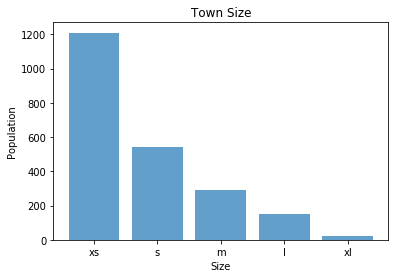

In [21]:
#At first, I wanted to group by city size to see if it would make an impact. However,I found it extremely difficult to group
xs,s,m,l,xl=(0,0,0,0,0)
for i in range(len(df2)):
    counter = df2.iloc[i,5]
    if counter <= 25000:
        xs += 1
    elif (counter > 25000 and counter <=50000):
        s +=1
    elif (counter > 50000 and counter <= 100000):
        m +=1
    elif (counter  > 100000 and counter <= 500000):
        l += 1
    else:
        xl += 1
townsize= ('xs','s','m','l','xl')
counts = (xs,s,m,l,xl)
plt.bar(range(len(townsize)),counts,align='center',alpha=0.7,tick_label=townsize)
plt.title("Town Size")
plt.ylabel("Population")
plt.xlabel("Size")

The first thing I wanted to see was the percentage of homeless people and those in shelters. This statistic was not included in the original data but I was able to calculate it relatively easily. Those who are able to stay shelters are more hidden from view of others and may not be subject as much to both violent and non-violent types of crime or commit as frequently.

Text(0,0.5,'Percentage of Transients')

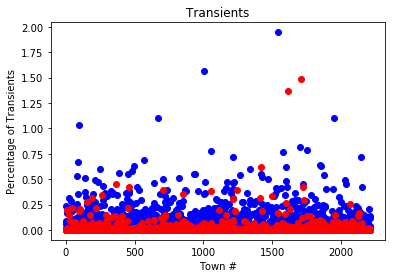

In [22]:
pctShelter = (df2.loc[:,'persEmergShelt']/df2.loc[:,'pop'])*100
pctHomeless = (df2.loc[:,'persHomeless']/df2.loc[:,'pop'])*100
plt.plot(pctShelter,marker='o',linewidth=0,color='blue')
plt.plot(pctHomeless,marker='o',linewidth=0,color='red')
plt.title("Transients")
plt.xlabel("Town #")
plt.ylabel("Percentage of Transients")
#plotting the percentage of people in shelter and homeless in all the cities 

Immediately when looking at the graph we can see that the larges # of those living in shelters seems to be around 2% which is good since it means there isn’t a high homeless pattern in any of the towns, leaving one less variable to worry about, since a significantly large homeless population when compared to other cities, may affect crime rates more than expected. I expected there to possibly include more higher amounts of homeless to create a better training set. However, even in New York City, the percentage seems to be extremely low. Generally, the percentage of those on the streets are lower than those in shelters, meaning the city has room to accommodate most of the people in the shelters, which could mean that since the city has enough money to combat the homeless situation, it would typically have a higher presence of officers present, leading to less crime, or a higher socio-economic level in the community, also possibly leading to lower crime rates. 

The next plot is them plotted against each other. Specifically, I wanted to do this to find outliers in the ratio of those living in the two separate places. These two types of cities would be particularly interesting to look at during the analysis: those with a higher percentage of those in shelters and extremely low on the streets, as well as an extremely low percentage in shelters and a higher percentage on the street. The former would usually mean a higher QOL and lower crime rates while the latter could mean higher crime rates.

Text(0,0.5,'Percentage living on streets')

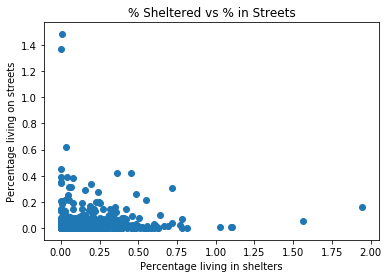

In [23]:
plt.scatter(pctShelter,pctHomeless)
plt.title("% Sheltered vs % in Streets")
plt.xlabel("Percentage living in shelters")
plt.ylabel("Percentage living on streets")

In the following plot, I wanted to see the distribution of cities in the data, and it seems like there is a rather unequal amount of urban to rural communities. There was not a baseline given for what was considered urban or not, but perhaps the best data set would have had a relatively equal number of urban and rural communities and a small but substantial number of communities within the two indicating varying levels of suburbia.

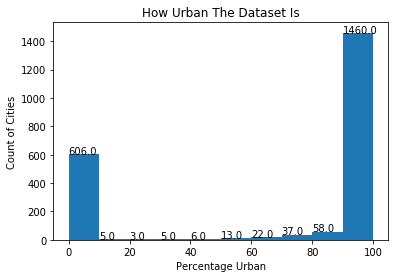

In [24]:
a = plt.hist(df2.pctUrban,bins=10)
plt.title("How Urban The Dataset Is")
plt.xlabel("Percentage Urban")
plt.ylabel("Count of Cities")
for i in range(10):
    plt.text(a[1][i],a[0][i],str(a[0][i]))

I then plotted urbanism to poverty because it made sense at least superficially that more urban areas would have a higher poverty level and therefore more crime. 

Text(0,0.5,'% in Poverty')

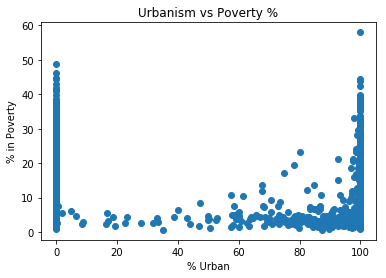

In [25]:
plt.scatter(df2.pctUrban,df2.pctPoverty)
plt.title("Urbanism vs Poverty %")
plt.xlabel("% Urban")
plt.ylabel("% in Poverty")

Urbanism does not seem to be directly correlated as based on the plot output there seems to be a high poverty level in rural areas as well. It is intriguing that the rates of poverty are among the lowest in semi urban then start climbing rapidly at 60% urban, yet completely rural neighborhoods show extremely high amounts of poverty.

To truly get the best idea of how, if at all violent crime was affected by these statistics, I graphed them to violent crime and came up with some interesting plots.

Text(0,0.5,'Violent Crime Committed per 100k Population')

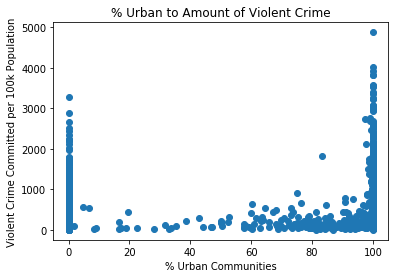

In [26]:
plt.scatter(df2.pctUrban,df2.violentPerPop)
plt.title("% Urban to Amount of Violent Crime")
plt.xlabel("% Urban Communities")
plt.ylabel("Violent Crime Committed per 100k Population")

Text(0,0.5,'Violent Crime Committed per 100k Population')

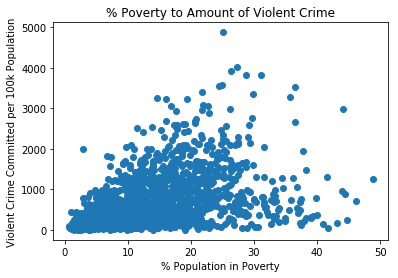

In [27]:
plt.scatter(df2.pctPoverty,df2.violentPerPop)
plt.title("% Poverty to Amount of Violent Crime")
plt.xlabel("% Population in Poverty")
plt.ylabel("Violent Crime Committed per 100k Population")

This seemed to suggest to me, when comparing the percentage of what was considered urban communities to other graphs, that the result was nearly the same, that poverty, violent crime, and other factors just seemed to fall in the same place each time with no obvious best fit line being able to be drawn saying definitively, that urbanism caused an increase in violent crime. However, when looking at the poverty level to amount of violent crime, although not a perfect fit, seems to have a better correlation. This is kept in mind when doing statistical analysis later on.

In addition, I plotted two things I found interesting, that weren't directly related to the crime rate, however, I thought was important to note, because I think that it could be a motivating factor when people think that they need to commit crime, and that is the comparison between the unemployment rate and the poverty level. When comparing the two percentages, in a perfect world, only those unemployed would be living in poverty level and we should find that the levels are equal.

Text(0,0.5,'%')

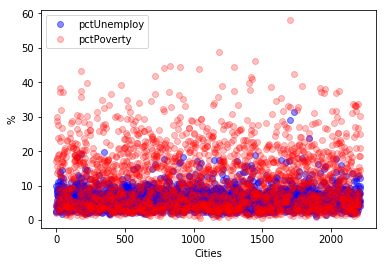

In [28]:
plt.plot(df2.pctUnemploy,marker='o',linewidth=0,color='blue',alpha=0.45)
plt.plot(df2.pctPoverty,marker='o',linewidth=0,color='red',alpha=0.25)
plt.legend()
plt.xlabel("Cities")
plt.ylabel("%")

The fact that so many red points occur above the bulk of the blue points shows a very important point, that people are employed and yet still living in poverty. This can be a contributing factor particularly to non-violent crime such as theft, in order to make sure that their own families have enough to sustain themselves, since just employment is not enough to do so.

While plotting the above, I figured that races would play an important part in how much they were earning and what poverty levels would look like, and ultimately playing a part in how much crime was committed.

The median income for whitePerCap is:15073.0


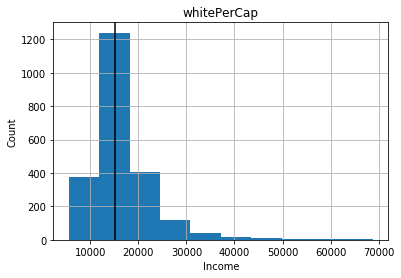

The median income for blackPerCap is:9777.0


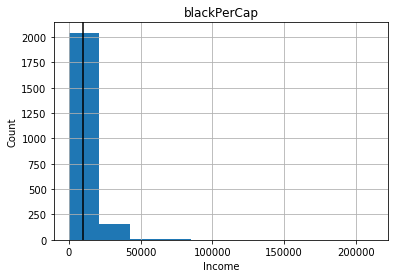

The median income for NAperCap is:9895.0


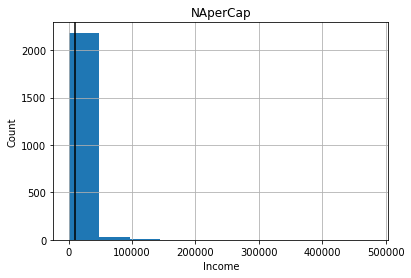

The median income for asianPerCap is:12250.0


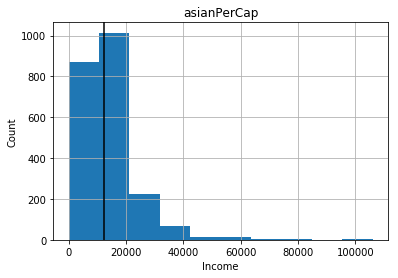

The median income for hispPerCap is:9721.0


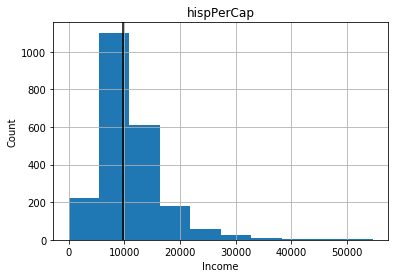

In [29]:
races = ['whitePerCap','blackPerCap','NAperCap','asianPerCap','hispPerCap']
for each in races:
    df2.hist(each)
    plt.rcParams['figure.figsize'] = [6, 4]
    plt.axvline(df2[each].median(),color='black')
    print("The median income for " + each + " is:"+ str(df2[each].median()))
    plt.xlabel("Income")
    plt.ylabel("Count")
    plt.show()
#hist for income across each race 

Through this analysis, I found that the impact of the variables I wanted to look at might not have been as big as I first intended, so my intention now was to try to use statistical analysis to try to find out, that would help when working with the machine learning parts as well.

# Statistical Analysis

The amount of inferential stats to be done with this data was limited at best, since showing how closely related two independent variables were was not an end goal in this project, and there were far too many independent to dependent variable combinations to test for significance of each one with t tests, so inferential statistics for the project is as follows: checking the crime rates, both violent and nonviolent are statistically significantly different from known national averages, seeing if there is a statistically significant difference between the rates of violent and nonviolent crime rates themselves, and in addition, looking at single correlation levels of variables that would be used later on in the machine learning portions.

In [30]:
from scipy import stats
#Allows me to use built in hypothesis testing in the scipy library

The first is a T-test on two related scores. In this case, I am assuming that despite them not being literally the same variable, that there would be some relationship hence related between the rate of violent and nonviolent crimes. Here I assume, in that in general, cities with higher crime rates in general would have equally high numbers of violent and nonviolent crime. The null hypothesis is that the rate of violent crimes and nonviolent crimes have identical values.

In [31]:
stats.ttest_rel(df3['violentPerPop'],df3['nonViolPerPop'])

Ttest_relResult(statistic=-86.22944044398825, pvalue=0.0)

After running the test, we see a relatively large t-statistic and a p-value of zero, which leads to the rejection of the null hypothesis. What this means is there is a statistically significant difference between the two, therefore a high violent crime rate doesn’t necessarily mean that the town/city has a higher non-violent crime rate as well.

I reran the test with the assumption that the two crime rates are completely independent. Once again, we are testing for an equal average value.

In [32]:
stats.ttest_ind(df3['violentPerPop'],df3['nonViolPerPop'])

Ttest_indResult(statistic=-74.07687371250995, pvalue=0.0)

As expected, we once again ran into a low p value of 0.0 leading to a rejection of the null hypothesis of averages being equal. However, it is interesting to note that I did end up with a slightly smaller t-statistic. This leads me to believe that it is better to interpret the two crime rates to be more independent from each other than related.

In addition to the two sample T-tests, I also decided to run some one-sample tests with each of the rates to determine how significant the rates were to Statista’s national crime rate average for the year of crime data that we have, 1995, as well as their property crime rate which fits all the categories of nonviolent crime as a rate per 100,000. These natural averages are good to use to see if the dataset is a true representation of the nation.

In [33]:
stats.ttest_1samp(df3['violentPerPop'],popmean=684.5)

Ttest_1sampResult(statistic=-9.373097575761404, pvalue=1.6787175679920635e-20)

In [34]:
stats.ttest_1samp(df3['nonViolPerPop'],popmean=4590.5)

Ttest_1sampResult(statistic=5.206976308193499, pvalue=2.0966873033342525e-07)

As the results indicates, it is different enough to reject the null hypothesis that the sample is equal to the mean. However, it is interesting to note that despite the p-values being low enough to reject that the t-statistics are low, meaning that it is not obscenely far from the expected values compared to other possible data.

Last but not least, I decided to correlate the independent variables to the two dependent variables to find the pearson r’s to find which variables seem to be more correlated to the end result of crime rates.
Strong correlations could mean that they would have a higher weight towards getting a closer result when doing predictions. This was important to sort through as there were hundreds of independent
variables, and while the machine learning algorithms would do a lot of the work for me in determining the most important in the group, it would also be good to know for future data creation which variables are most important.

In [35]:
#dropped the non-numerical categories and the folds which dont matter
cols=[0,1,2,3,4]
dropped_strings=df3.drop(df3.columns[cols],axis=1)
correlations = dropped_strings.astype(float).corrwith(df3.violentPerPop)
r1 = pd.DataFrame(data=correlations.sort_values().drop_duplicates())
r1.columns=['R-values']
print(r1)

pd.concat([r1.head(10),r1.tail(10)])


                     R-values
pctKids2Par         -0.684059
pct2Par             -0.649762
pctWhite            -0.647164
pct12-17w2Par       -0.616963
pctKids-4w2Par      -0.611884
pctWdiv             -0.534563
pctPersOwnOccup     -0.494272
pctHousOwnerOccup   -0.443022
medFamIncome        -0.394124
medIncome           -0.380866
medNumBedrm         -0.340307
pctOccupMgmt        -0.302273
pctEmploy           -0.301905
perCapInc           -0.299019
pctCollGrad         -0.280659
pctWwage            -0.279318
pctHousOccup        -0.265112
rentLowQ            -0.239677
pctSpeakOnlyEng     -0.226231
rentMed             -0.224650
medGrossRent        -0.220286
rentUpperQ          -0.213606
hispPerCap          -0.206221
blackPerCap         -0.199667
ownHousLowQ         -0.177098
whitePerCap         -0.176021
ownHousMed          -0.160205
ownHousUperQ        -0.147590
pctSameHouse-5      -0.140625
pctWorkMom-18       -0.138837
...                       ...
burglaries           0.288434
medRentpct

,R-values
pctKids2Par,-0.684059
pct2Par,-0.649762
pctWhite,-0.647164
pct12-17w2Par,-0.616963
pctKids-4w2Par,-0.611884
pctWdiv,-0.534563
pctPersOwnOccup,-0.494272
pctHousOwnerOccup,-0.443022
medFamIncome,-0.394124
medIncome,-0.380866


In [36]:
#dropped the non-numerical categories and the folds which dont matter
cols=[0,1,2,3,4]
dropped_strings=df3.drop(df3.columns[cols],axis=1)
correlations = dropped_strings.astype(float).corrwith(df3.nonViolPerPop)
r2 = pd.DataFrame(data=correlations.sort_values().drop_duplicates())
r2.columns=['R-values']
print(r2)

pd.concat([r2.head(10),r2.tail(10)])

                     R-values
pctKids2Par         -0.653018
pct2Par             -0.645484
pct12-17w2Par       -0.608651
pctKids-4w2Par      -0.598805
pctPersOwnOccup     -0.495958
pctWdiv             -0.482246
pctWhite            -0.475897
medIncome           -0.462785
pctHousOwnerOccup   -0.457087
medFamIncome        -0.453612
medNumBedrm         -0.392922
medGrossRent        -0.338187
pctWwage            -0.333536
rentUpperQ          -0.333070
rentMed             -0.332208
pctEmploy           -0.320604
perCapInc           -0.320581
rentLowQ            -0.319904
pctHousOccup        -0.306836
pctOccupMgmt        -0.293367
ownHousLowQ         -0.289001
pctCollGrad         -0.276455
ownHousMed          -0.272894
persPerOwnOccup     -0.271873
ownHousUperQ        -0.259292
hispPerCap          -0.252874
rentQrange          -0.237863
blackPerCap         -0.237313
pctSameHouse-5      -0.225865
whitePerCap         -0.220102
...                       ...
larcenies            0.230133
pctFgnImmi

,R-values
pctKids2Par,-0.653018
pct2Par,-0.645484
pct12-17w2Par,-0.608651
pctKids-4w2Par,-0.598805
pctPersOwnOccup,-0.495958
pctWdiv,-0.482246
pctWhite,-0.475897
medIncome,-0.462785
pctHousOwnerOccup,-0.457087
medFamIncome,-0.453612


Of the correlations done above, the most important take aways were the top 10 and bottom 10 of all variables correlated. These are the most correlated with the overall crime rate, and have implications for future data gathering. 

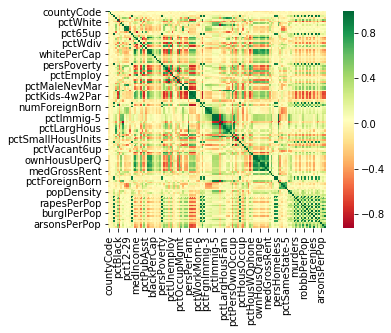

In [37]:
sns.heatmap(df3.corr(), square=True, cmap='RdYlGn')

# Regressions

I decided to take a look at 3 different types of regression here to see which one would best fit the data and create the most accurate predictions. The goal here is to be able to pick the best algorithm to use, along with new updated data, and generate on-demand results of what neighborhoods to focus on. In this project, I compare 3 different types of regression: Linear Regression, Ridge Regression, and Random Forest Regression. 

## Linear Regression

### Violent Crime LR

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#EVERYTHING EXCEPT THE VARIABLES TO BE PREDICTED
df4=df3.iloc[:, 6:-19]
X = df4
y=df3.violentPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred = np.round(y_pred,2)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5437290599695604
Root Mean Squared Error: 392.1659231096209


In [111]:
viol_dict= dict(zip(df3.violentPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = viol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together1 = pd.DataFrame()
together1['Cities']=cities
together1['Actual'] = head
together1['Predicted']=y_pred[0:5]
together1

,Cities,Actual,Predicted
0,Turlock,847.77,577.00
1,Bridgeton,2241.85,1875.08
2,Harrisonburg,151.78,311.92
3,Hayward,1118.18,925.06
4,Waynesboro,337.96,627.34


In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg,X,y,cv=10)
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.42370352 0.58666425 0.58745404 0.50681906 0.54663601 0.56636859
 0.5298578  0.46863456 0.53333068 0.57113814]
Average 10-Fold CV Score: 0.5320606642136791


### Nonviolent Crime LR

In [112]:
X = df4
y=df3.nonViolPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred = np.round(y_pred,2)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.4711521420303177
Root Mean Squared Error: 2139.8709139461266


In [114]:
nonviol_dict= dict(zip(df3.nonViolPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = nonviol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together1n = pd.DataFrame()
together1n['Cities']=cities
together1n['Actual'] = head
together1n['Predicted']=y_pred[0:5]
together1n

,Cities,Actual,Predicted
0,Turlock,7632.05,5475.45
1,Bridgeton,8005.85,8507.37
2,Harrisonburg,4264.75,5080.85
3,Hayward,6251.13,6193.29
4,Waynesboro,4198.13,5909.05


In [41]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg,X,y,cv=10)
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.47478744 0.49818154 0.56051688 0.44020437 0.55334418 0.57867281
 0.48200858 0.60337453 0.4133917  0.54025266]
Average 10-Fold CV Score: 0.5144734692557623


## Ridge Regression

### Violent Crime RR 

R^2: 0.5446793226080374
Root Mean Squared Error: 391.75739545423096


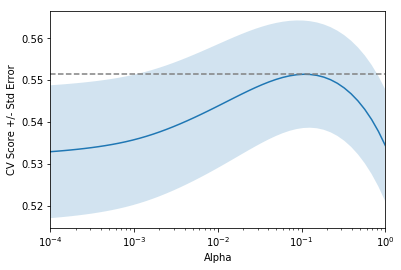

In [115]:
X = df4
y=df3.violentPerPop

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
    
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
rid = Ridge()
rid.fit(X_train,y_train)
y_pred = rid.predict(X_test)
y_pred = np.round(y_pred,2)
print("R^2: {}".format(rid.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)
# Compute scores over range of alphas
for alpha in alpha_space:
    ridge.alpha = alpha
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)




In [116]:
viol_dict= dict(zip(df3.violentPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = viol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together2 = pd.DataFrame()
together2['Cities']=cities
together2['Actual'] = head
together2['Predicted']=y_pred[0:5]
together2

,Cities,Actual,Predicted
0,Turlock,847.77,571.65
1,Bridgeton,2241.85,1863.30
2,Harrisonburg,151.78,303.16
3,Hayward,1118.18,916.16
4,Waynesboro,337.96,616.25


### Nonviolent Crime RR 

R^2: 0.4720334142731091
Root Mean Squared Error: 2138.087273996554


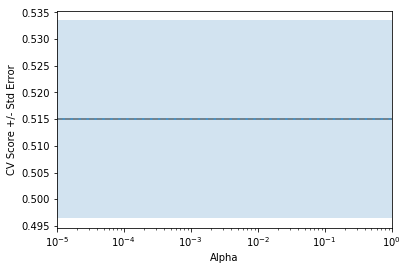

In [117]:
X = df4
y=df3.nonViolPerPop

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
rid = Ridge()
rid.fit(X_train,y_train)
y_pred = rid.predict(X_test)
y_pred = np.round(y_pred,2)
print("R^2: {}".format(rid.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

alpha_space = np.logspace(-5, 0, 50)
ridge_scores = []
ridge_scores_std = []

for alpha in alpha_space:
    ridge.alpha = alpha
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(rid,X,y,cv=10)
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
display_plot(ridge_scores, ridge_scores_std)


In [118]:
nonviol_dict= dict(zip(df3.nonViolPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = nonviol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together2n = pd.DataFrame()
together2n['Cities']=cities
together2n['Actual'] = head
together2n['Predicted']=y_pred[0:5]
together2n

,Cities,Actual,Predicted
0,Turlock,7632.05,5483.65
1,Bridgeton,8005.85,8451.01
2,Harrisonburg,4264.75,4926.89
3,Hayward,6251.13,6140.77
4,Waynesboro,4198.13,5827.57


## Random Forest Regression

### Violent Crime RFR

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
X = df4
y=df3.violentPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)


# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
y_pred = np.round(predictions,2)

print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5932457884692801
Root Mean Squared Error: 370.27503703261243


In [123]:
viol_dict= dict(zip(df3.violentPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = viol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together3 = pd.DataFrame()
together3['Cities']=cities
together3['Actual'] = head
together3['Predicted']=y_pred[0:5]
together3

,Cities,Actual,Predicted
0,Turlock,847.77,673.53
1,Bridgeton,2241.85,1781.98
2,Harrisonburg,151.78,394.59
3,Hayward,1118.18,859.89
4,Waynesboro,337.96,460.66


In [48]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg,X,y,cv=10)
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.42370352 0.58666425 0.58745404 0.50681906 0.54663601 0.56636859
 0.5298578  0.46863456 0.53333068 0.57113814]
Average 10-Fold CV Score: 0.5320606642136791


### Nonviolent Crime RFR

In [106]:
X = df4
y=df3.nonViolPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)


# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
y_pred = np.round(predictions,2)

print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.42963221254123274
Root Mean Squared Error: 2222.28463409814


In [107]:
nonviol_dict= dict(zip(df3.nonViolPerPop,df3.communityname))

first5 = y_test[0:5]
cities= []
head = []
for i in first5:
    head.append(i)
    city = nonviol_dict.get(i)
    city= city[:-4]
    cities.append(city)
    
together = pd.DataFrame()
together['Cities']=cities
together['Actual'] = head
together['Predicted']=y_pred[0:5]
together

,Cities,Actual,Predicted
0,Turlock,7632.05,5513.71
1,Bridgeton,8005.85,7668.40
2,Harrisonburg,4264.75,4669.15
3,Hayward,6251.13,6301.94
4,Waynesboro,4198.13,5350.08


In [119]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg,X,y,cv=10)
print(cv_scores)

print("Average 10-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.47478744 0.49818154 0.56051688 0.44020437 0.55334418 0.57867281
 0.48200858 0.60337453 0.4133917  0.54025266]
Average 10-Fold CV Score: 0.5144734692557623


## Regression Conclusion

To choose what the best regression is, I looked at two criteria for the each of them, the r-squared value that each regression decided to come up with, and the root mean squared error value. The r-square differ slightly for each type of regression because the type of regressor affects how well the data might be fit. In addition, we are looking for the lowest RMSE value, which would be cloesest to the best fit line. In my situation, the Random Forest Regressor did the best job, and I would recommend using this regression to determine which communities to look at.

In addition, I would recommend that this algorithm only be used to assess violent crime in a certain area, and not non-violent crime. When looking at the RMSEs for non-violent crime, the differences are far too large to be able to say that is a good predictor. In additional work on this project at a later time, I would like to try to find the best regression for non-violent crimes, but I do not feel comfortable saying that any of these 3 are good benchmarks. 

Those with STEM backgrounds may be alarmed at the relatively low r-squared values, but these seem reasonable given that human behavior is difficult to predict, and the dataset has an extremely large number of independent variables to consider. To make the model even more accurate, I would attempt to narrow down the independent variables, or eliminate them by the data collection phase, and that would generate a more accurate model. 

In [124]:
print(together1)
print(together2)
print(together3)

         Cities   Actual  Predicted
0       Turlock   847.77     577.00
1     Bridgeton  2241.85    1875.08
2  Harrisonburg   151.78     311.92
3       Hayward  1118.18     925.06
4    Waynesboro   337.96     627.34
         Cities   Actual  Predicted
0       Turlock   847.77     571.65
1     Bridgeton  2241.85    1863.30
2  Harrisonburg   151.78     303.16
3       Hayward  1118.18     916.16
4    Waynesboro   337.96     616.25
         Cities   Actual  Predicted
0       Turlock   847.77     673.53
1     Bridgeton  2241.85    1781.98
2  Harrisonburg   151.78     394.59
3       Hayward  1118.18     859.89
4    Waynesboro   337.96     460.66


For just easy visual purposes, I just grabbed the first 5 cities that came up and put them side by side with the predicted values for violent crime in those cities. As you can see, the 3rd type of regression I performed, the Random Forest Regression, did the best job of predicting, though far from perfect. This is due to imperfections in the data, where I had to put the median of a variable to fill in missing data in the columns, as well as hundreds of independent variables which all affected the outcome in a small shape or form. 

For the regressions shown above, all predictive variables were included in the dataset, while those that were meant to predicted, were left out, such as the numbers of certain types of crimes that had already been committed. My focus was to see if I could pinpoint the best regression to use on the data that would still hold when the data within was updated. Since I saw that they were still relatively inaccurate, I wanted to see if I could help pinpoint what data to look out for, when the data collection phase was still occurring. 

Looking back upon when the pearson r's were calculated, I picked the first and last 10, with the exception of the very last one, which was with it correlated with itself, and ran Linear Regressions to see if I could minimize the amount of error. Example code is shown below. If automated beyond gradually adding the first and last 10, and done regeneratively throughout the entire set of independent variables, one could find the most important of the independent variables, and focus on having thorough complete data when running the algorithm for the most accurate results.

In [160]:
X = df3[['pctAllDivorc','pctBlack','pctKidsBornNevrMarr','pctPubAsst']]
y=df3.violentPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.4753381376985189
Root Mean Squared Error: 420.53113286203245


In [161]:
X = df3[['pctAllDivorc','pctBlack','pctKidsBornNevrMarr','pctPubAsst','pctWhite']]
y=df3.violentPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5114426657178701
Root Mean Squared Error: 405.8038598556739


Automating this method to take each of the highest correlated variables, and calculating the lowest RMSE would give you the best chance at creating a dataset that would be accurate and more concise. The Random Forest Regression struggled a bit with time due to how many different variables there were, and narrowing down to the best ones would generate nearly instantaneous results.

## Recommendations

At this point, we have pinpointed the best regression to use, and possibly even, what data to use, but the question of "What do I do with this?" still remains to be answered. I believe that a company looking to invest, either in improving city infrastructure to reduce crime or increasing law enforcement presence, would benefit from looking at the list of cities where the most violent crime in that year was committed, and use it as a list of where needs the most work first. Of course, size considerations must be taken into place as well. 

This is in no means meant to be a perfect representation of what crime looks like in certain cities. However, I believe this to be a good starting point and building block towards reducing crime across the nation.

Revisiting our best regression for violent crime, the Random Forest Regression:

In [128]:
X = df4
y=df3.violentPerPop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)


# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
y_pred = np.round(predictions,2)



In [138]:
combo = zip(y_test,y_pred)
a,b = zip(*sorted(combo,key=lambda x: x[0],reverse=True))

In [159]:
most = a[0:21]
popdict= dict(zip(df3['communityname'],df3['pop']))
cities= []
head = []
population = []
for i in most:
    head.append(i)
    city = viol_dict.get(i)
    pop = popdict.get(city)
    population.append(pop)
    city= city[:-4]
    cities.append(city)
    
together3 = pd.DataFrame()
together3['Cities']=cities
together3['Population']=population
together3['Actual'] = head
together3['Predicted']=b[0:21]
together3

,Cities,Population,Actual,Predicted
0,Atlanta,394017,4026.59,2303.77
1,AtlanticCity,37986,3583.48,2619.88
2,Richmond,203056,3239.20,1812.77
3,SanBernardino,164164,3047.66,1419.41
4,BatonRouge,219531,2978.69,1455.40
5,Lynwood,61945,2956.98,1355.16
6,Oakland,372242,2601.60,2010.66
7,Commerce,12135,2584.96,1045.63
8,Hawthorne,71349,2541.38,1606.93
9,Mansfield,50627,2493.17,878.04


So above are the top 20 cities with the highest amount of actual crime per 100,000 population, alongside the populations of each city, so that at a glance, one can tell which have the highest percentage. Below is the same sorted by predicted crime. 

In [164]:
combo = zip(y_test,y_pred)
a,b = zip(*sorted(combo,key=lambda x: x[1],reverse=True))
most = a[0:21]
popdict= dict(zip(df3['communityname'],df3['pop']))
cities= []
head = []
population = []
for i in most:
    head.append(i)
    city = viol_dict.get(i)
    pop = popdict.get(city)
    population.append(pop)
    city= city[:-4]
    cities.append(city)
    
together4 = pd.DataFrame()
together4['Cities']=cities
together4['Population']=population
together4['Actual'] = head
together4['Predicted']=b[0:21]
together4[1:21]

,Cities,Population,Actual,Predicted
1,CollegePark,20457,1874.95,2544.325161
2,AtlanticCity,37986,3583.48,2441.849855
3,Atlanta,394017,4026.59,2199.101243
4,Burton,27617,374.06,2170.767103
5,Inglewood,109602,2078.85,2015.093299
6,Pleasantville,16027,1730.67,1994.936979
7,WarrensvilleHeights,15745,929.91,1936.268545
8,Richmond,203056,1617.17,1877.331541
9,Cambridge,11514,1514.12,1765.474212
10,NewHaven,130474,2127.02,1760.288557


The vast differences in particularly, with Burton having predicted values much larger than the actual value is due to the way I filled in the missing data with the median of the column that it was missing. I chose not to do mean as to skew values towards larger or smaller cities, and thus took a hit in the accuracy level of the algorithm in favor of having more reasonable results overall.

## Final Thoughts

1) As one can see for the most part, the list of the top 20 cities is roughly the same between the actual crime rates and the predicted. Therefore, I believe this is the best regression to use to find which cities need the most work. 

2) Using the most up to date data with this algorithm would generate the most up to date list of predicted violent crime rate for a certain area, leading to the best decision making by cities themselves, or 3rd party companies to come in and offer opportunities to provide a safer living place for its citizens. 

3) When going and working on collecting new data, the company/city has the opportunity to look at what is most important when determining the predicted crime rate, and ensure that data is the most accurate and complete before using the algorithm, to ensure the most accurate output. 

4) Given the data that I was, and assuming that while the data itself may change, the causes of people commiting crime don't, and thus despite changes in the data, the algorithm should still hold accurate, and Random Forest remains the best regression to use.

5) However, once again, this is in no means meant to serve as an accurate predictor for when and how much crime will happen, only to offer guidelines to those seeking to make cities safer.